In [14]:
import numpy as np
import nilearn as nil
from nilearn import plotting as plotting
import nibabel as nib

# Matrices

In [2]:
m = np.load('matrices_ses-all_run-03_schaefer2018.npz')

In [3]:
mats = m['mats']

In [4]:
sids = m['sids']
ses = m['ses']

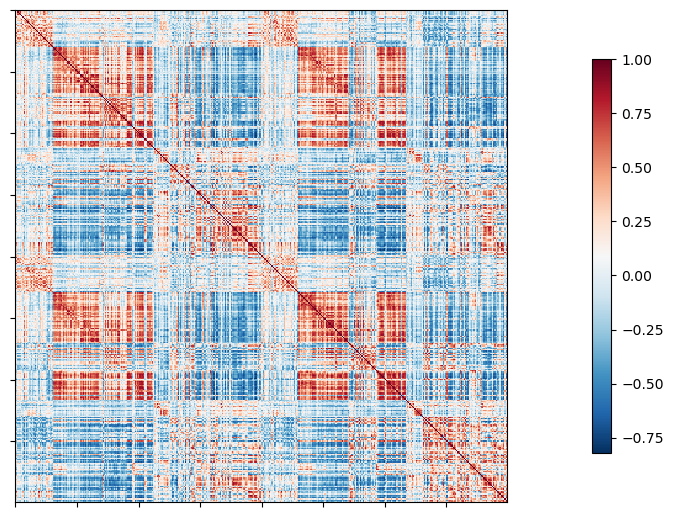

In [5]:
plotting.plot_matrix(mats[180].squeeze())

# Atlas

In [6]:
from nilearn import datasets
# Note: Craddok 2012 atlas
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=400, 
                                         yeo_networks=7, 
                                         resolution_mm=1, 
                                         data_dir=None, 
                                         base_url=None, 
                                         resume=True, 
                                         verbose=1)

In [7]:
# Loading atlas image stored in 'maps'
atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels = atlas['labels']

In [8]:
import re
labelsd = np.char.decode(labels)
nets = set([re.search(r'7Networks_[LR]H_([^_]*)_.*',i.decode()).group(1) for i in labels])
nets

{'Cont', 'Default', 'DorsAttn', 'Limbic', 'SalVentAttn', 'SomMot', 'Vis'}

In [11]:
import shutil, os
#os.makedirs('./imgs')

In [12]:
#shutil.copyfile(atlas_filename, './imgs/{}'.format(os.path.basename(atlas_filename)))

In [15]:
atlas = nib.load(atlas_filename)

In [16]:
atlas_arr = atlas.get_fdata()

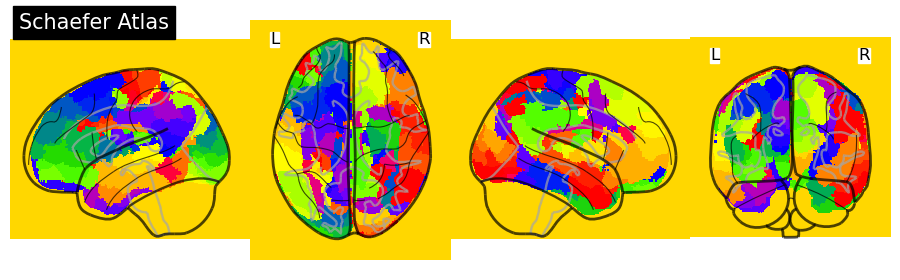

In [17]:
plotting.plot_glass_brain(atlas, plot_abs=False, display_mode='lzry',
                          title='Schaefer Atlas', threshold=None, cmap='prism')

# Networks

In [18]:
net_dict = dict()
for i in nets:
    net_dict[i] = []
for n,i in enumerate(labelsd):
    for net in nets:
        if net in i:
            net_dict[net].append(n)

In [19]:
net_dict.keys()

dict_keys(['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Cont', 'Default', 'Limbic'])

In [20]:
nii_nets = dict()
for i in list(net_dict.keys()):
    atlas_arr_net = np.where(np.isin(atlas_arr, net_dict[i]),1,0)
    nii_net = nib.Nifti1Image(atlas_arr_net, header=atlas.header, affine=atlas.affine)
    nib.save(nii_net, './imgs/{}.nii.gz'.format(i))
    nii_nets[i] = nii_net

In [21]:
nii_nets.keys()

dict_keys(['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Cont', 'Default', 'Limbic'])

In [22]:
nets_name =  { 'Vis':'Visual',
              'SomMot': 'Somatomotor',
              'DorsAttn': 'Dorsal attention',
              'SalVentAttn': 'Salience',
              'Cont': 'Control',
              'Default': 'Default mode',
              'Limbic': 'Limbic'}

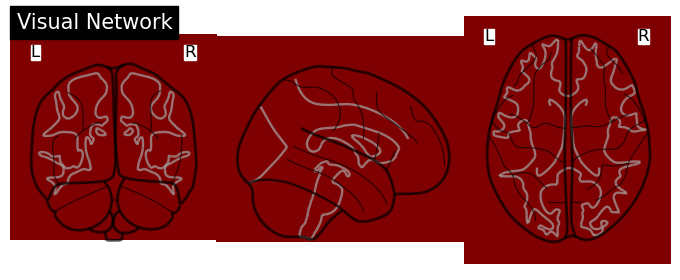

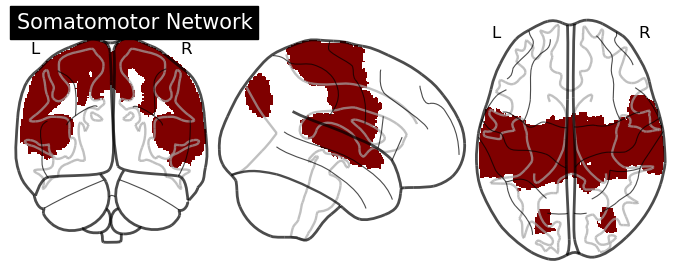

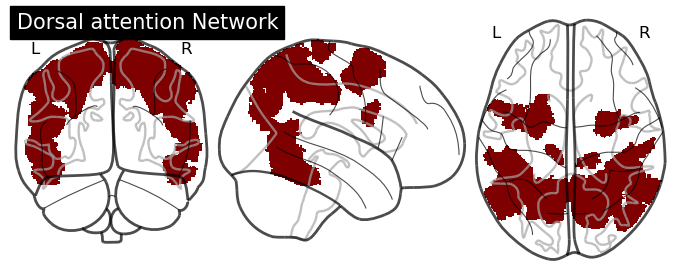

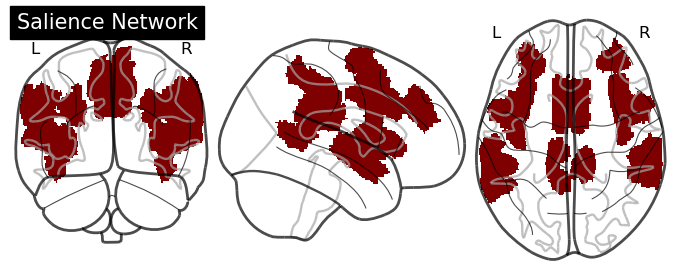

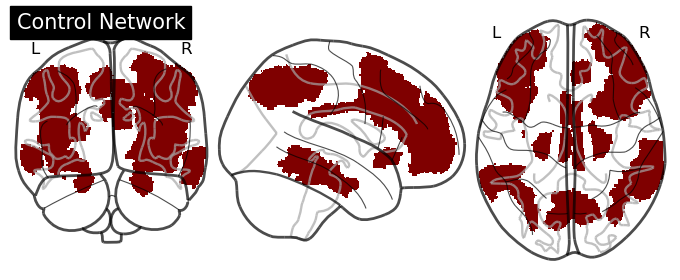

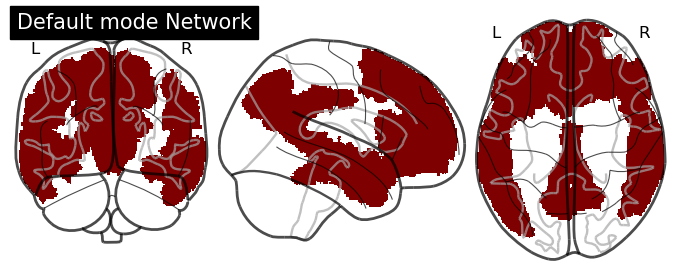

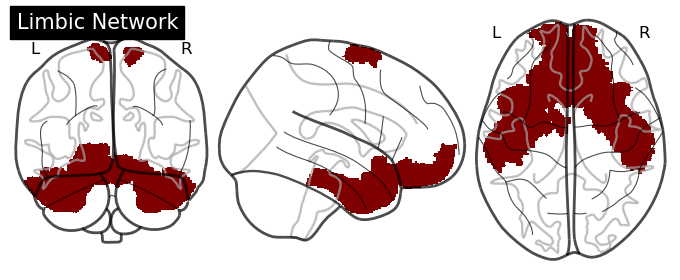

In [24]:
for i in list(nii_nets.keys()):
    plotting.plot_glass_brain(nii_nets[i], plot_abs=False,
                          title='{} Network'.format(nets_name[i]), threshold=0, cmap='seismic')
    plotting.show()

In [25]:
for i in list(nii_nets.keys()):
    plotting.plot_glass_brain(nii_nets[i], plot_abs=False,
                          title='{} Network'.format(nets_name[i]), 
                              threshold=0, 
                              cmap='seismic',
                             output_file='./imgs/{}.png'.format(nets_name[i]))

In [ ]:
from nilearn import datasets
fsaverage = datasets.fetch_surf_fsaverage()
import numpy as np
from nilearn import surface

curv_right = surface.load_surf_data(fsaverage.curv_right)
curv_right_sign = np.sign(curv_right)

In [ ]:
texture = surface.vol_to_surf(nii_nets['Default'], fsaverage.pial_right)

In [ ]:
from nilearn import plotting

fig = plotting.plot_surf_stat_map(
    fsaverage.infl_right, texture, hemi='right',
    title='Surface right hemisphere', colorbar=True,
    threshold=1., bg_map=curv_right_sign,
)
fig.show()

In [ ]:
np.unique(nii_nets['Default'].get_fdata())

In [ ]:
plotting.plot_img_on_surf(nii_nets['Default'],
                          views=['lateral', 'medial'],
                          hemispheres=['left', 'right'],
                          colorbar=True,
                         threshold=0,
                         cmap='Purples')
plotting.show()

In [ ]:
view = plotting.view_img_on_surf(
    nii_nets['Default'],
    surf_mesh="fsaverage",
    vol_to_surf_kwargs={"n_samples": 1, "radius": 0.0,
                        "interpolation": "nearest"},
    cmap='Purples',
    vmin=0,
    symmetric_cmap=False,
)

# view.open_in_browser()
view

In [ ]:
view = plotting.view_img_on_surf(
    atlas,
    surf_mesh="fsaverage",
    vol_to_surf_kwargs={"n_samples": 1, "radius": 0.0,
                        "interpolation": "nearest"},
    cmap='flag',
    vmin=0,
    symmetric_cmap=False,
)

# view.open_in_browser()
view